In this step we gone depth of matplotlib and seaborn libraries to analize the data with graphs.

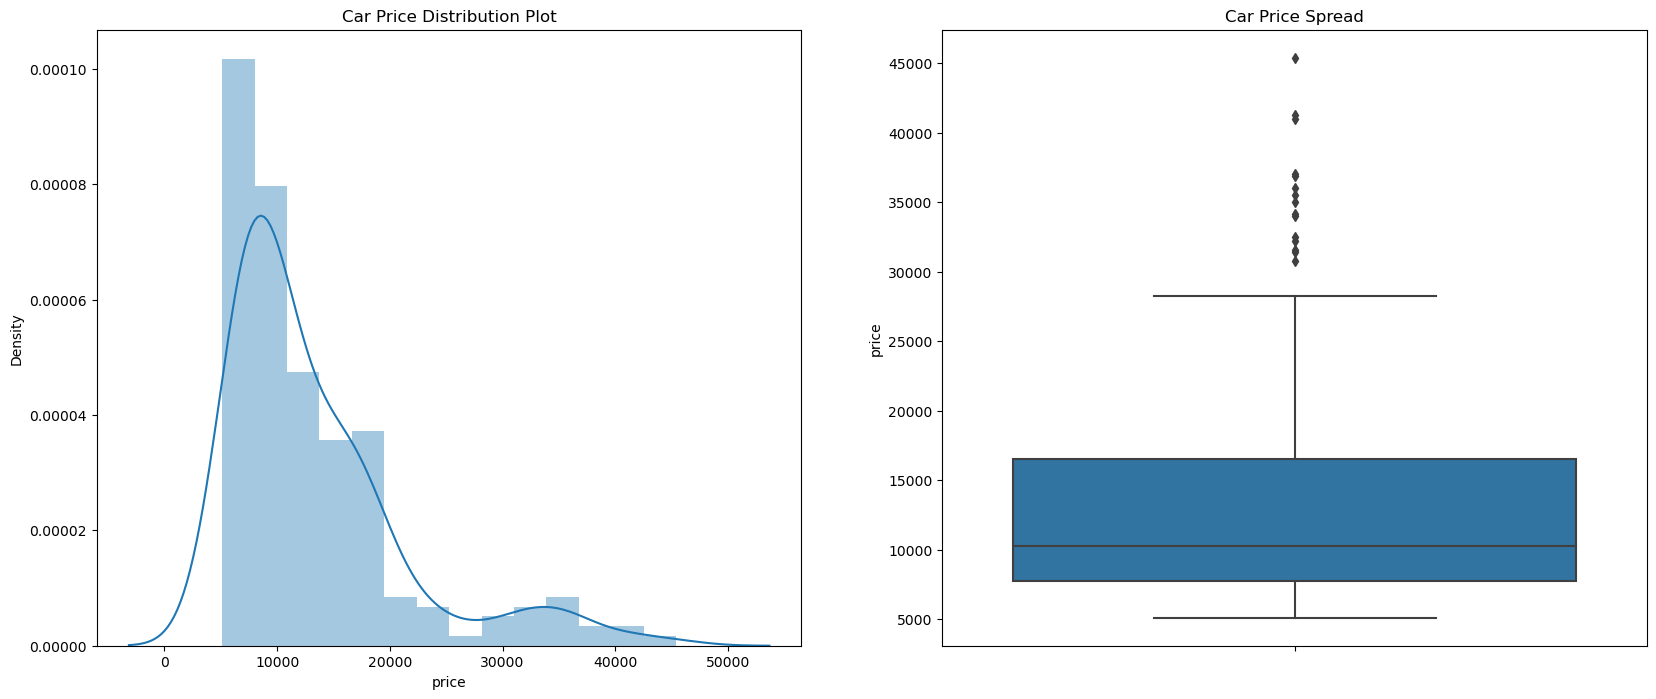

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=cars.price)

plt.show()

In [13]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


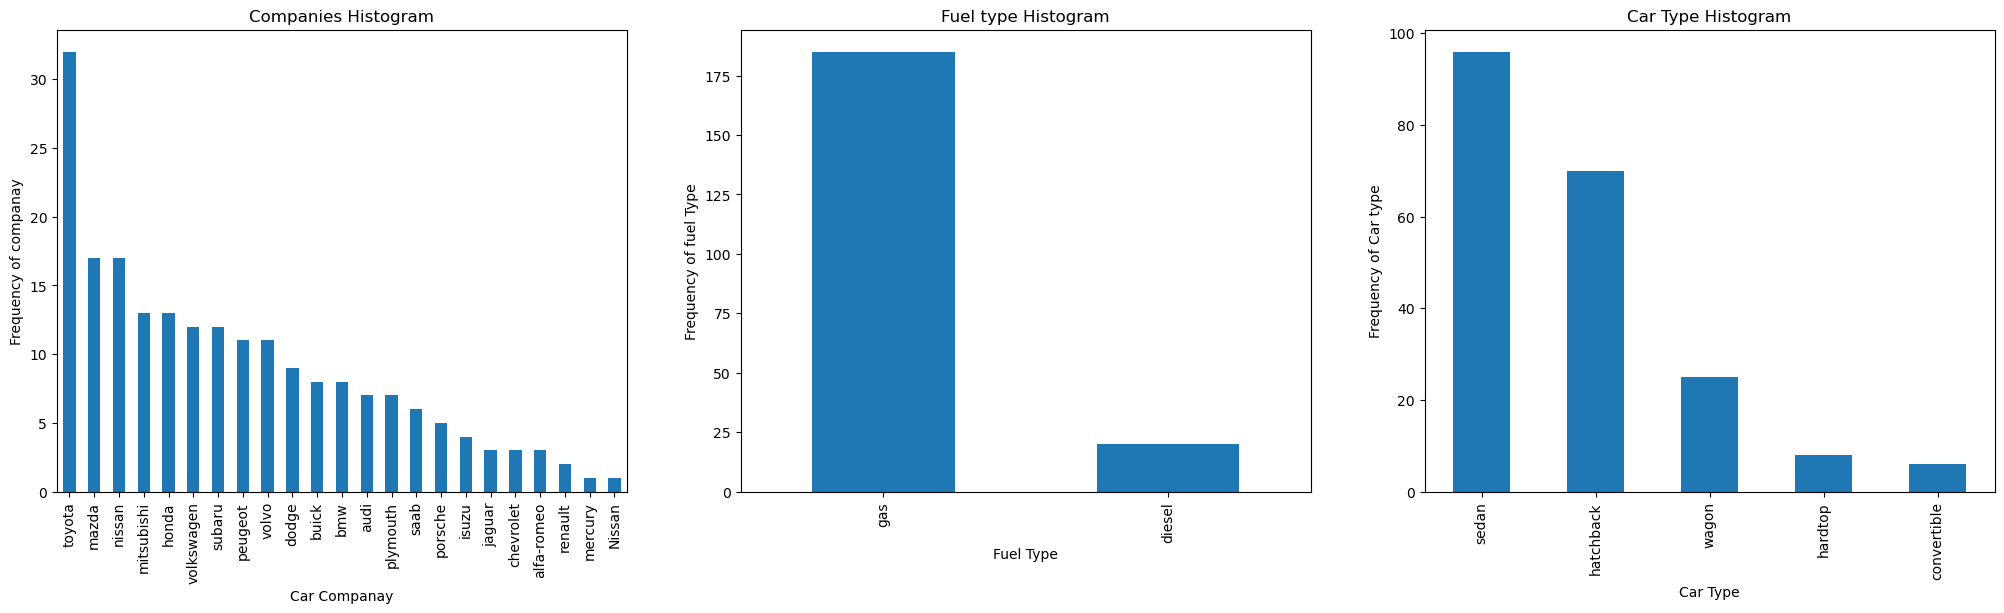

In [14]:
# Here we use 3 subplots in a row to viulize count of Companies,Full type cars,Car types.
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars.CompanayName.value_counts().plot(kind = 'bar')
plt.title("Companies Histogram")
plt1.set(xlabel = 'Car Companay',ylabel = 'Frequency of companay')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title("Fuel type Histogram")
plt1.set(xlabel = 'Fuel Type',ylabel = 'Frequency of fuel Type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type',ylabel = 'Frequency of Car type')

plt.show()

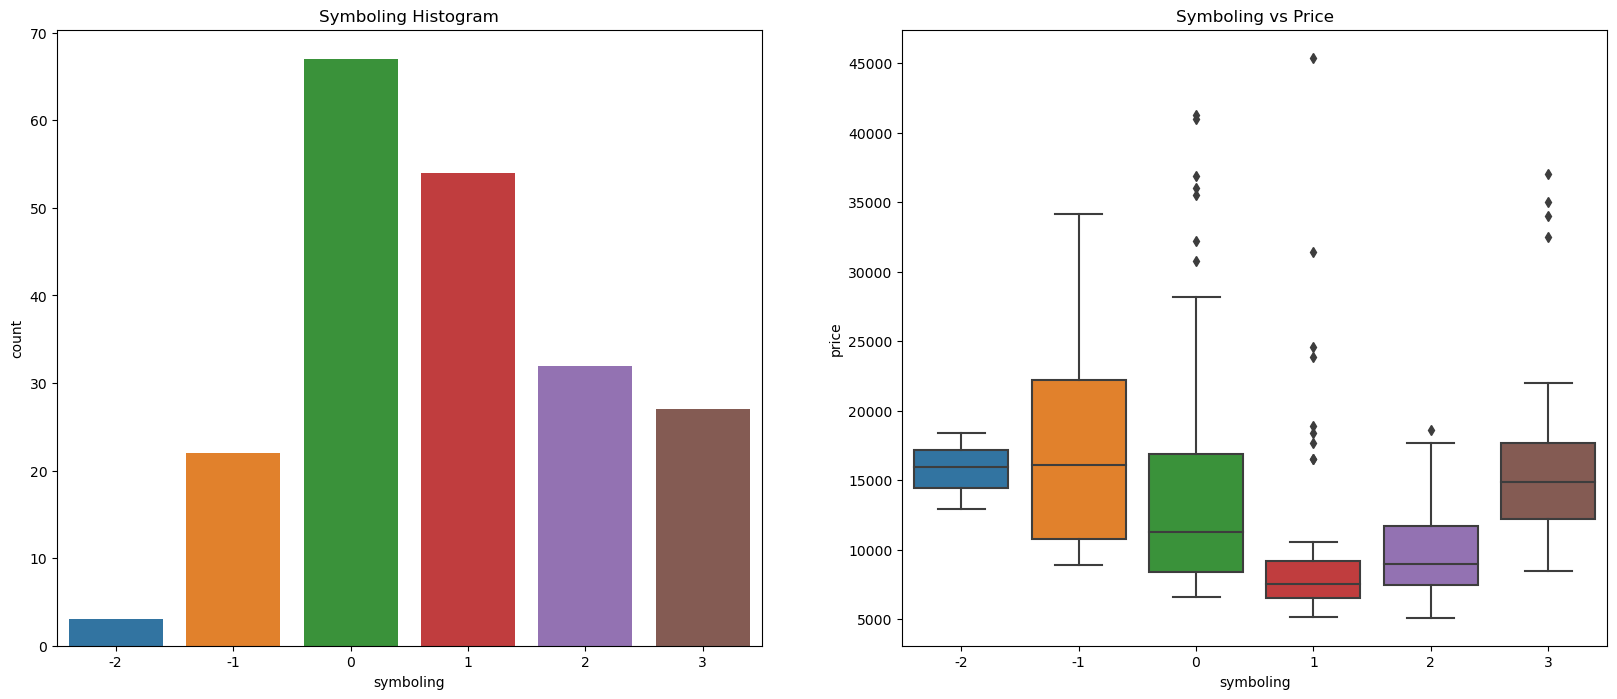

In [15]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x = cars.symboling, y = cars.price)

plt.show()

[]

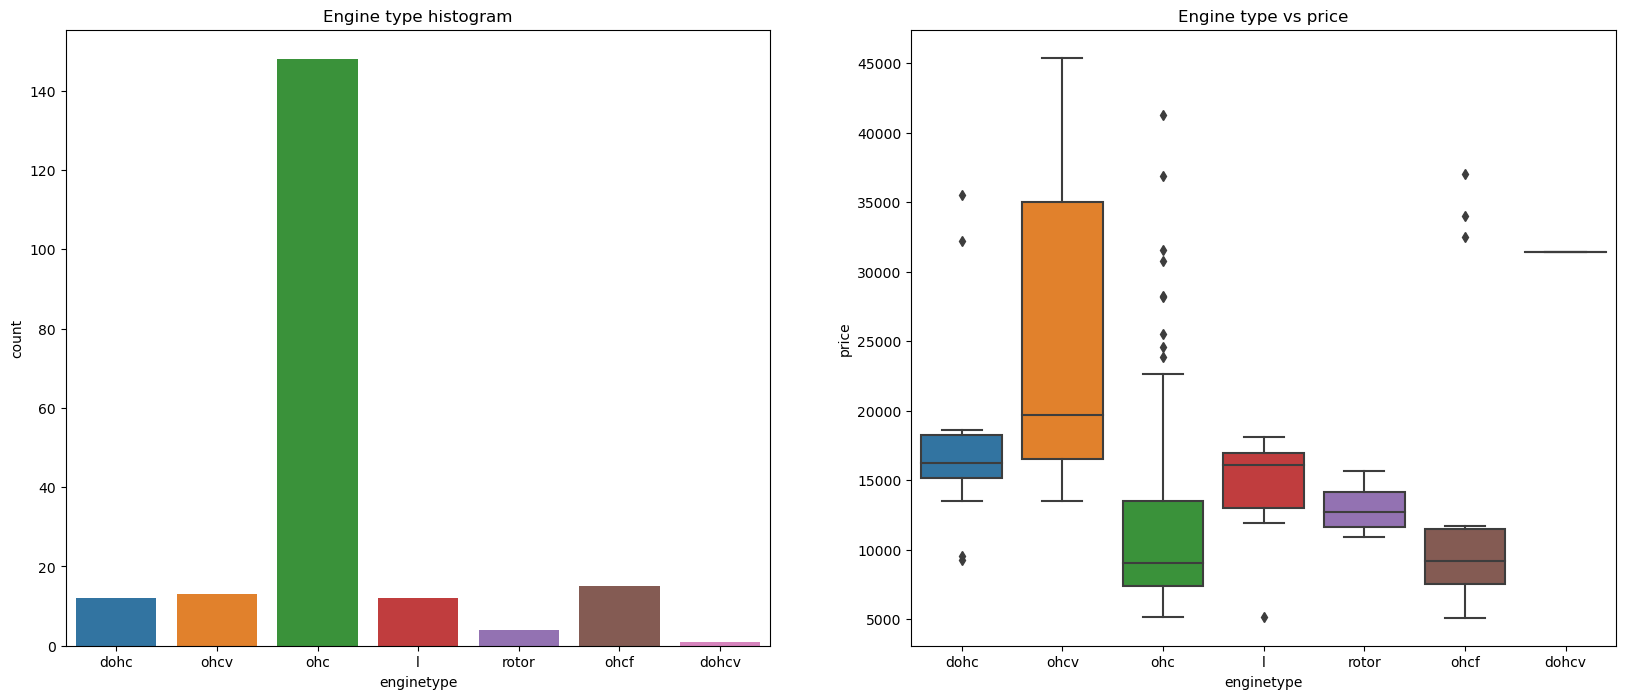

In [16]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title("Engine type histogram")
sns.countplot(cars.enginetype)

plt.subplot(1,2,2)
plt.title("Engine type vs price")
sns.boxplot(x = cars.enginetype,y = cars.price)
plt.plot()

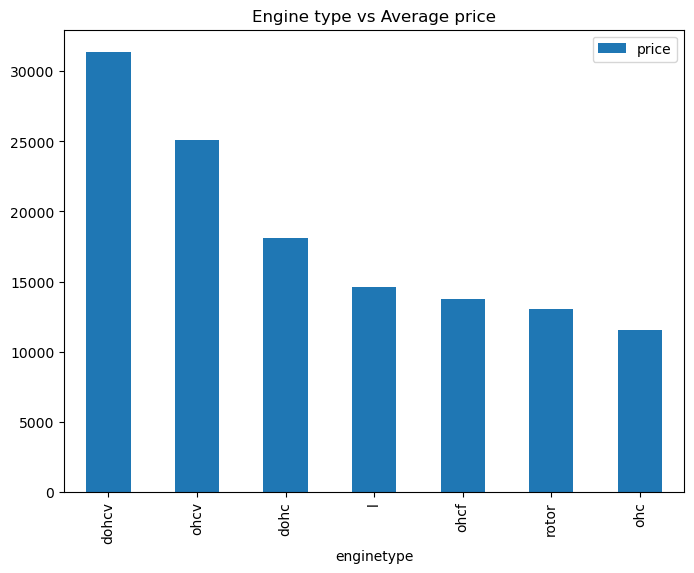

In [17]:
# In this block of code we creates a DataFrame df that calculates the average price of cars based on their engine types and then plots a 
# bar graph showing the relationship between engine type and average price.
df = pd.DataFrame(cars.groupby(["enginetype"])["price"].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title("Engine type vs Average price")
plt.show()

<Figure size 2500x600 with 0 Axes>

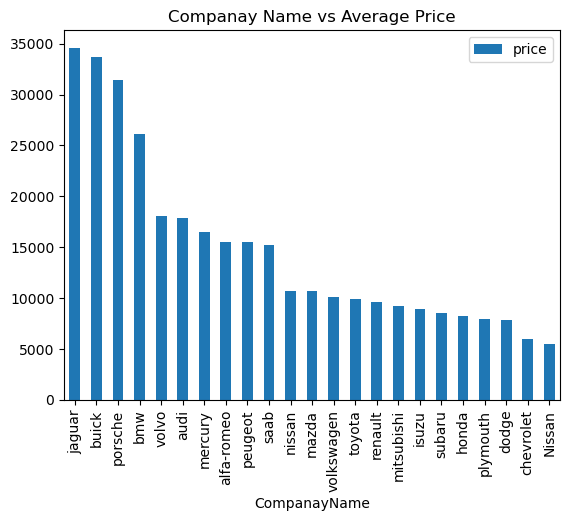

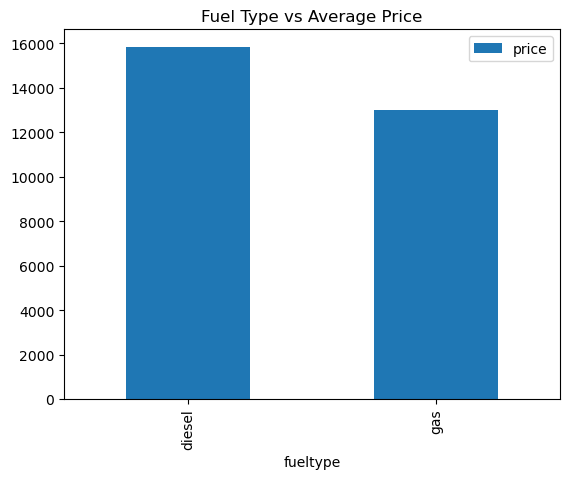

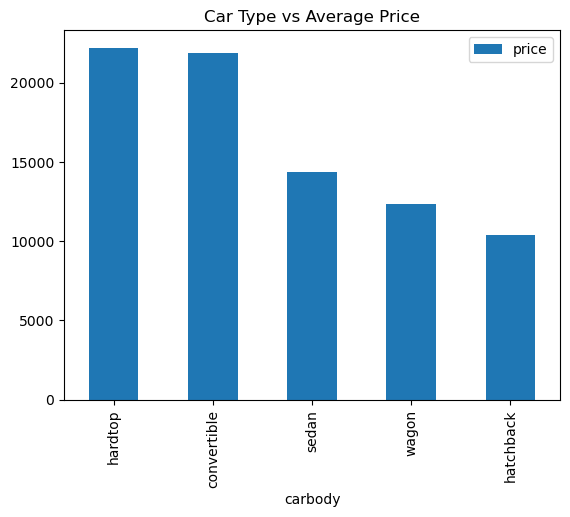

In [18]:
plt.figure(figsize = (25,6))
df = pd.DataFrame(cars.groupby(["CompanayName"])["price"].mean().sort_values(ascending = False))

df.plot.bar()
plt.title("Companay Name vs Average Price")

df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Fuel Type vs Average Price")

df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Car Type vs Average Price")

plt.show()

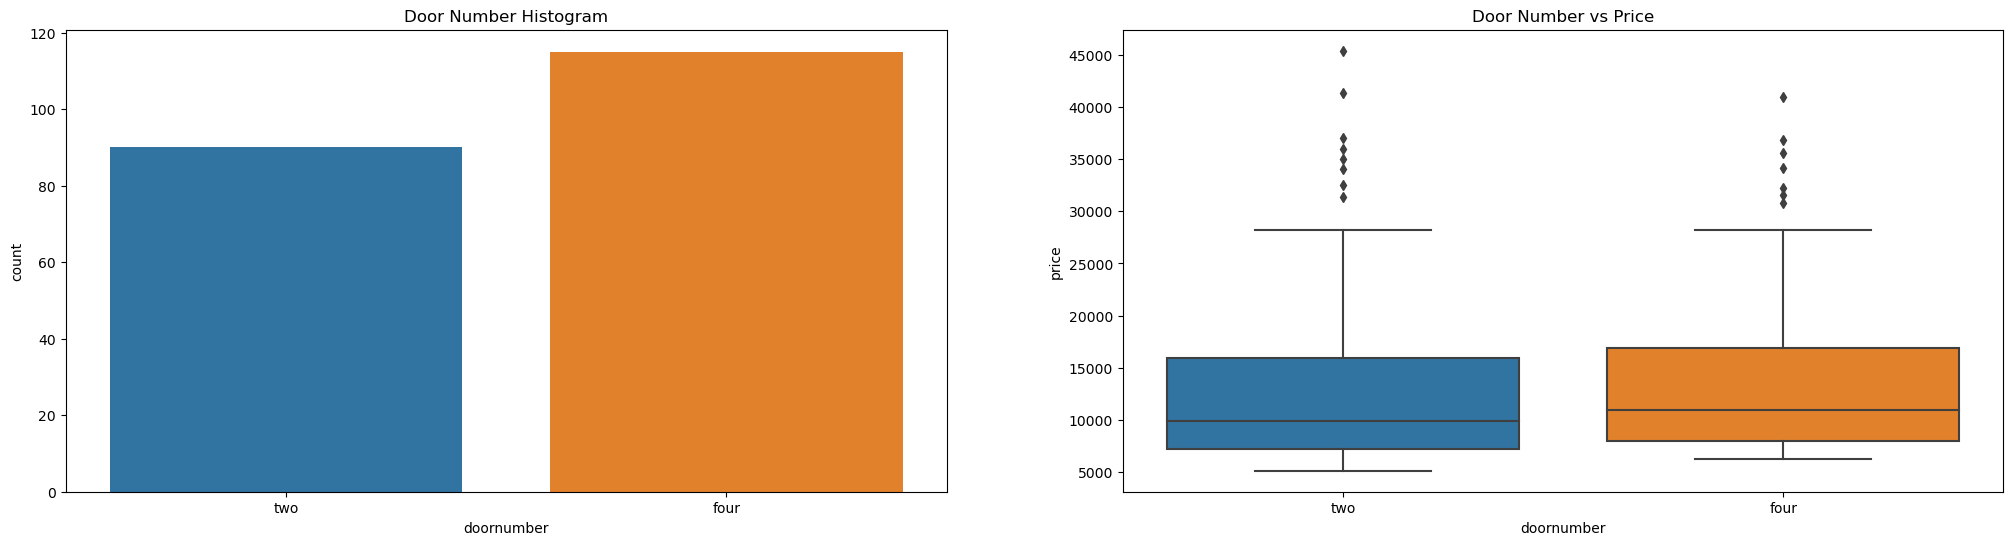

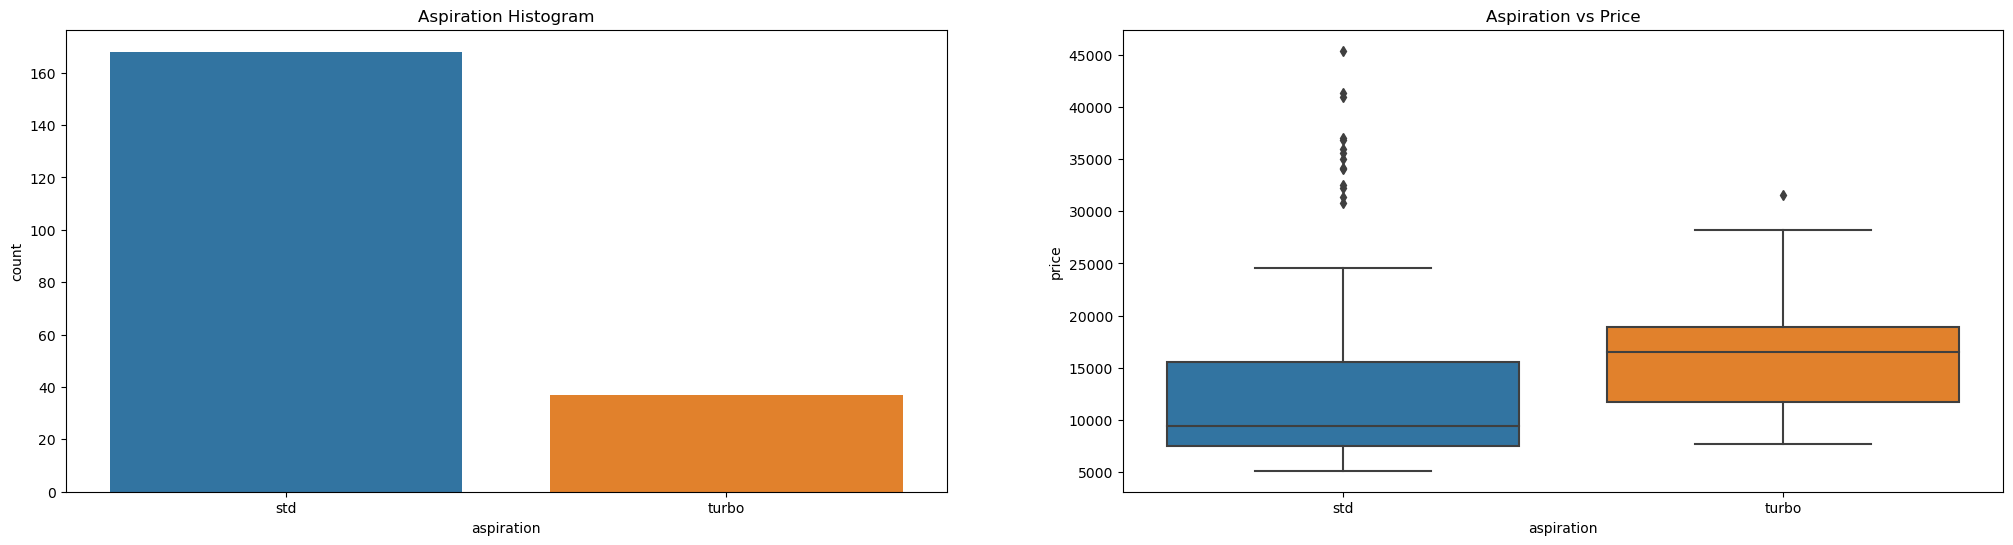

In [19]:
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
plt.title("Door Number Histogram")
sns.countplot(cars.doornumber)

plt.subplot(1,2,2)
plt.title("Door Number vs Price")
sns.boxplot(x=cars.doornumber, y = cars.price)

plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
sns.countplot(cars.aspiration)

plt.subplot(1,2,2)
plt.title("Aspiration vs Price")
sns.boxplot(x=cars.aspiration, y = cars.price)

plt.show()

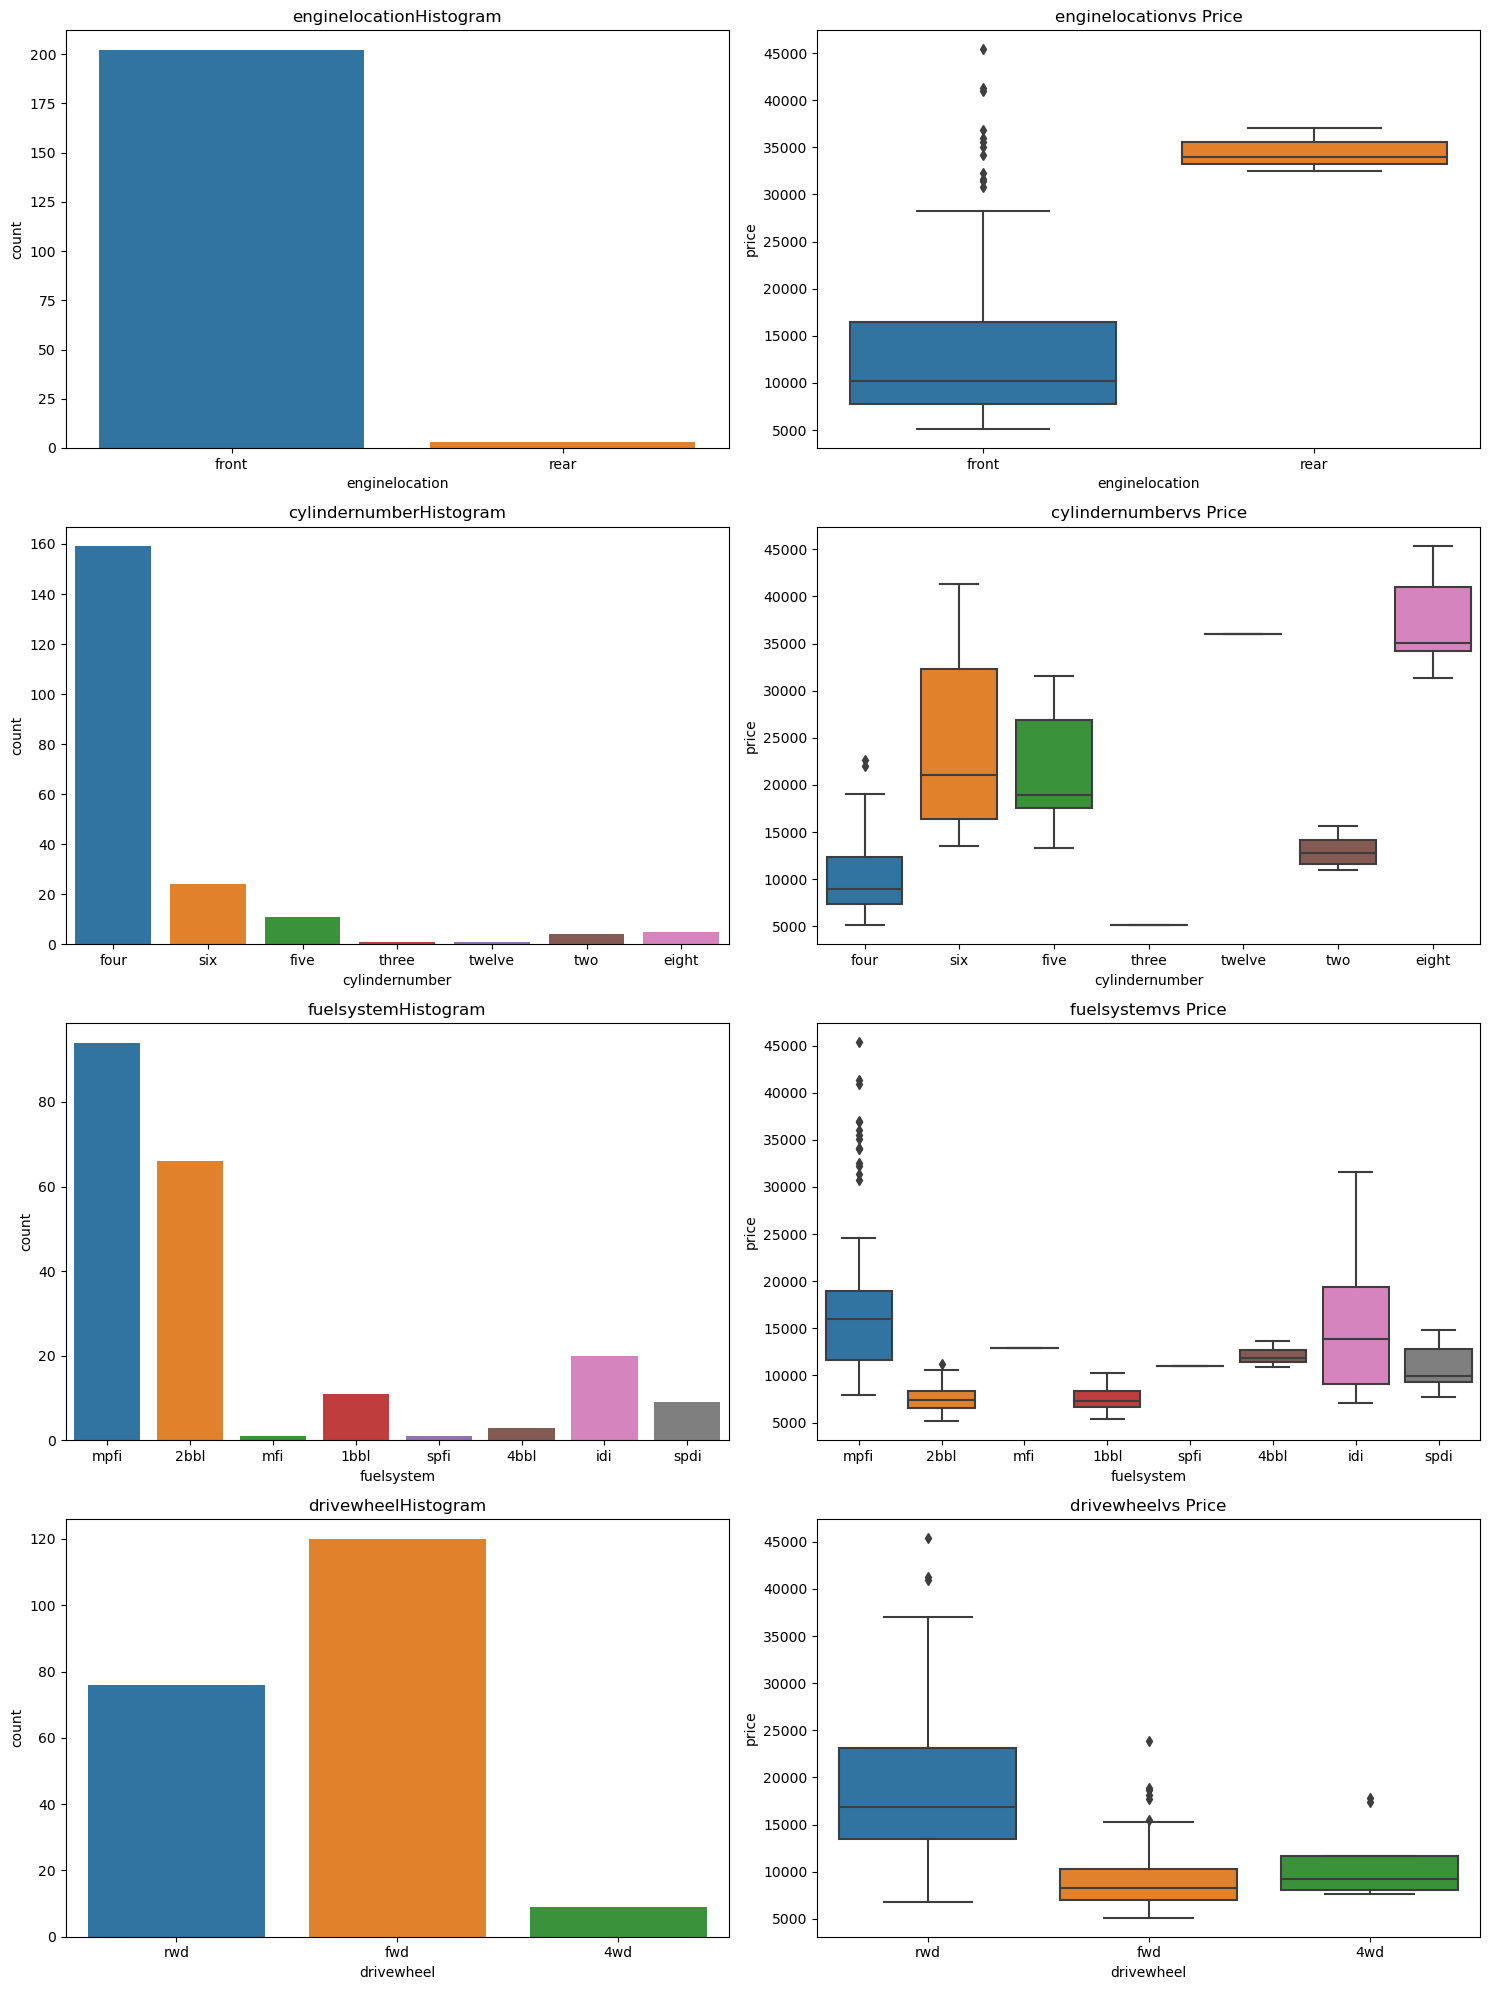

In [20]:
def plot_count(x,fig):
    
    plt.subplot(4,2,fig)
    plt.title(x + "Histogram")
    sns.countplot(cars[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x + "vs Price")
    sns.boxplot(x=cars[x],y=cars.price)

plt.figure(figsize=(15,20))
plot_count('enginelocation',1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7)
plt.tight_layout()


In [21]:
# Here we create a new column based n mean of citympg and highwaympg and then divde the cars into 3 price marks. All though there
# is no need to create a categorical values column.
cars["fueleconomy"] = (0.55 * cars["citympg"]) + (0.45 * cars["highwaympg"])
cars["price"] = cars["price"].astype(int)
temp = cars.copy()
tabel = temp.groupby(["CompanayName"])["price"].mean()
temp  = temp.merge(tabel.reset_index(),how = "left", on = "CompanayName")
bins  = [0,10000,20000,40000]
cars_bin = ["Budget","Medium","Highend"]
cars["carsrange"] = pd.cut(temp["price_y"],bins,right = False, labels = cars_bin)
cars.head()

,car_ID,symboling,CompanayName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


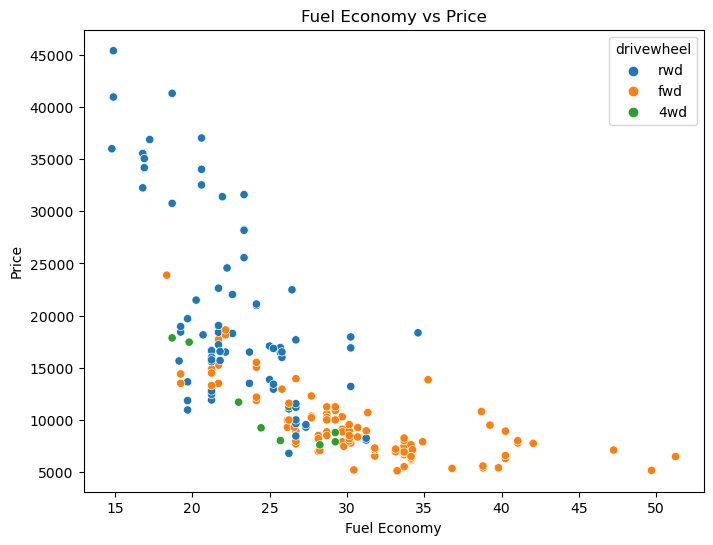

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(8,6))
plt.title("Fuel Economy vs Price")
sns.scatterplot(x=cars["fueleconomy"],y=cars["price"],hue = cars["drivewheel"])
plt.xlabel("Fuel Economy")
plt.ylabel("Price")
plt.show()
plt.tight_layout()

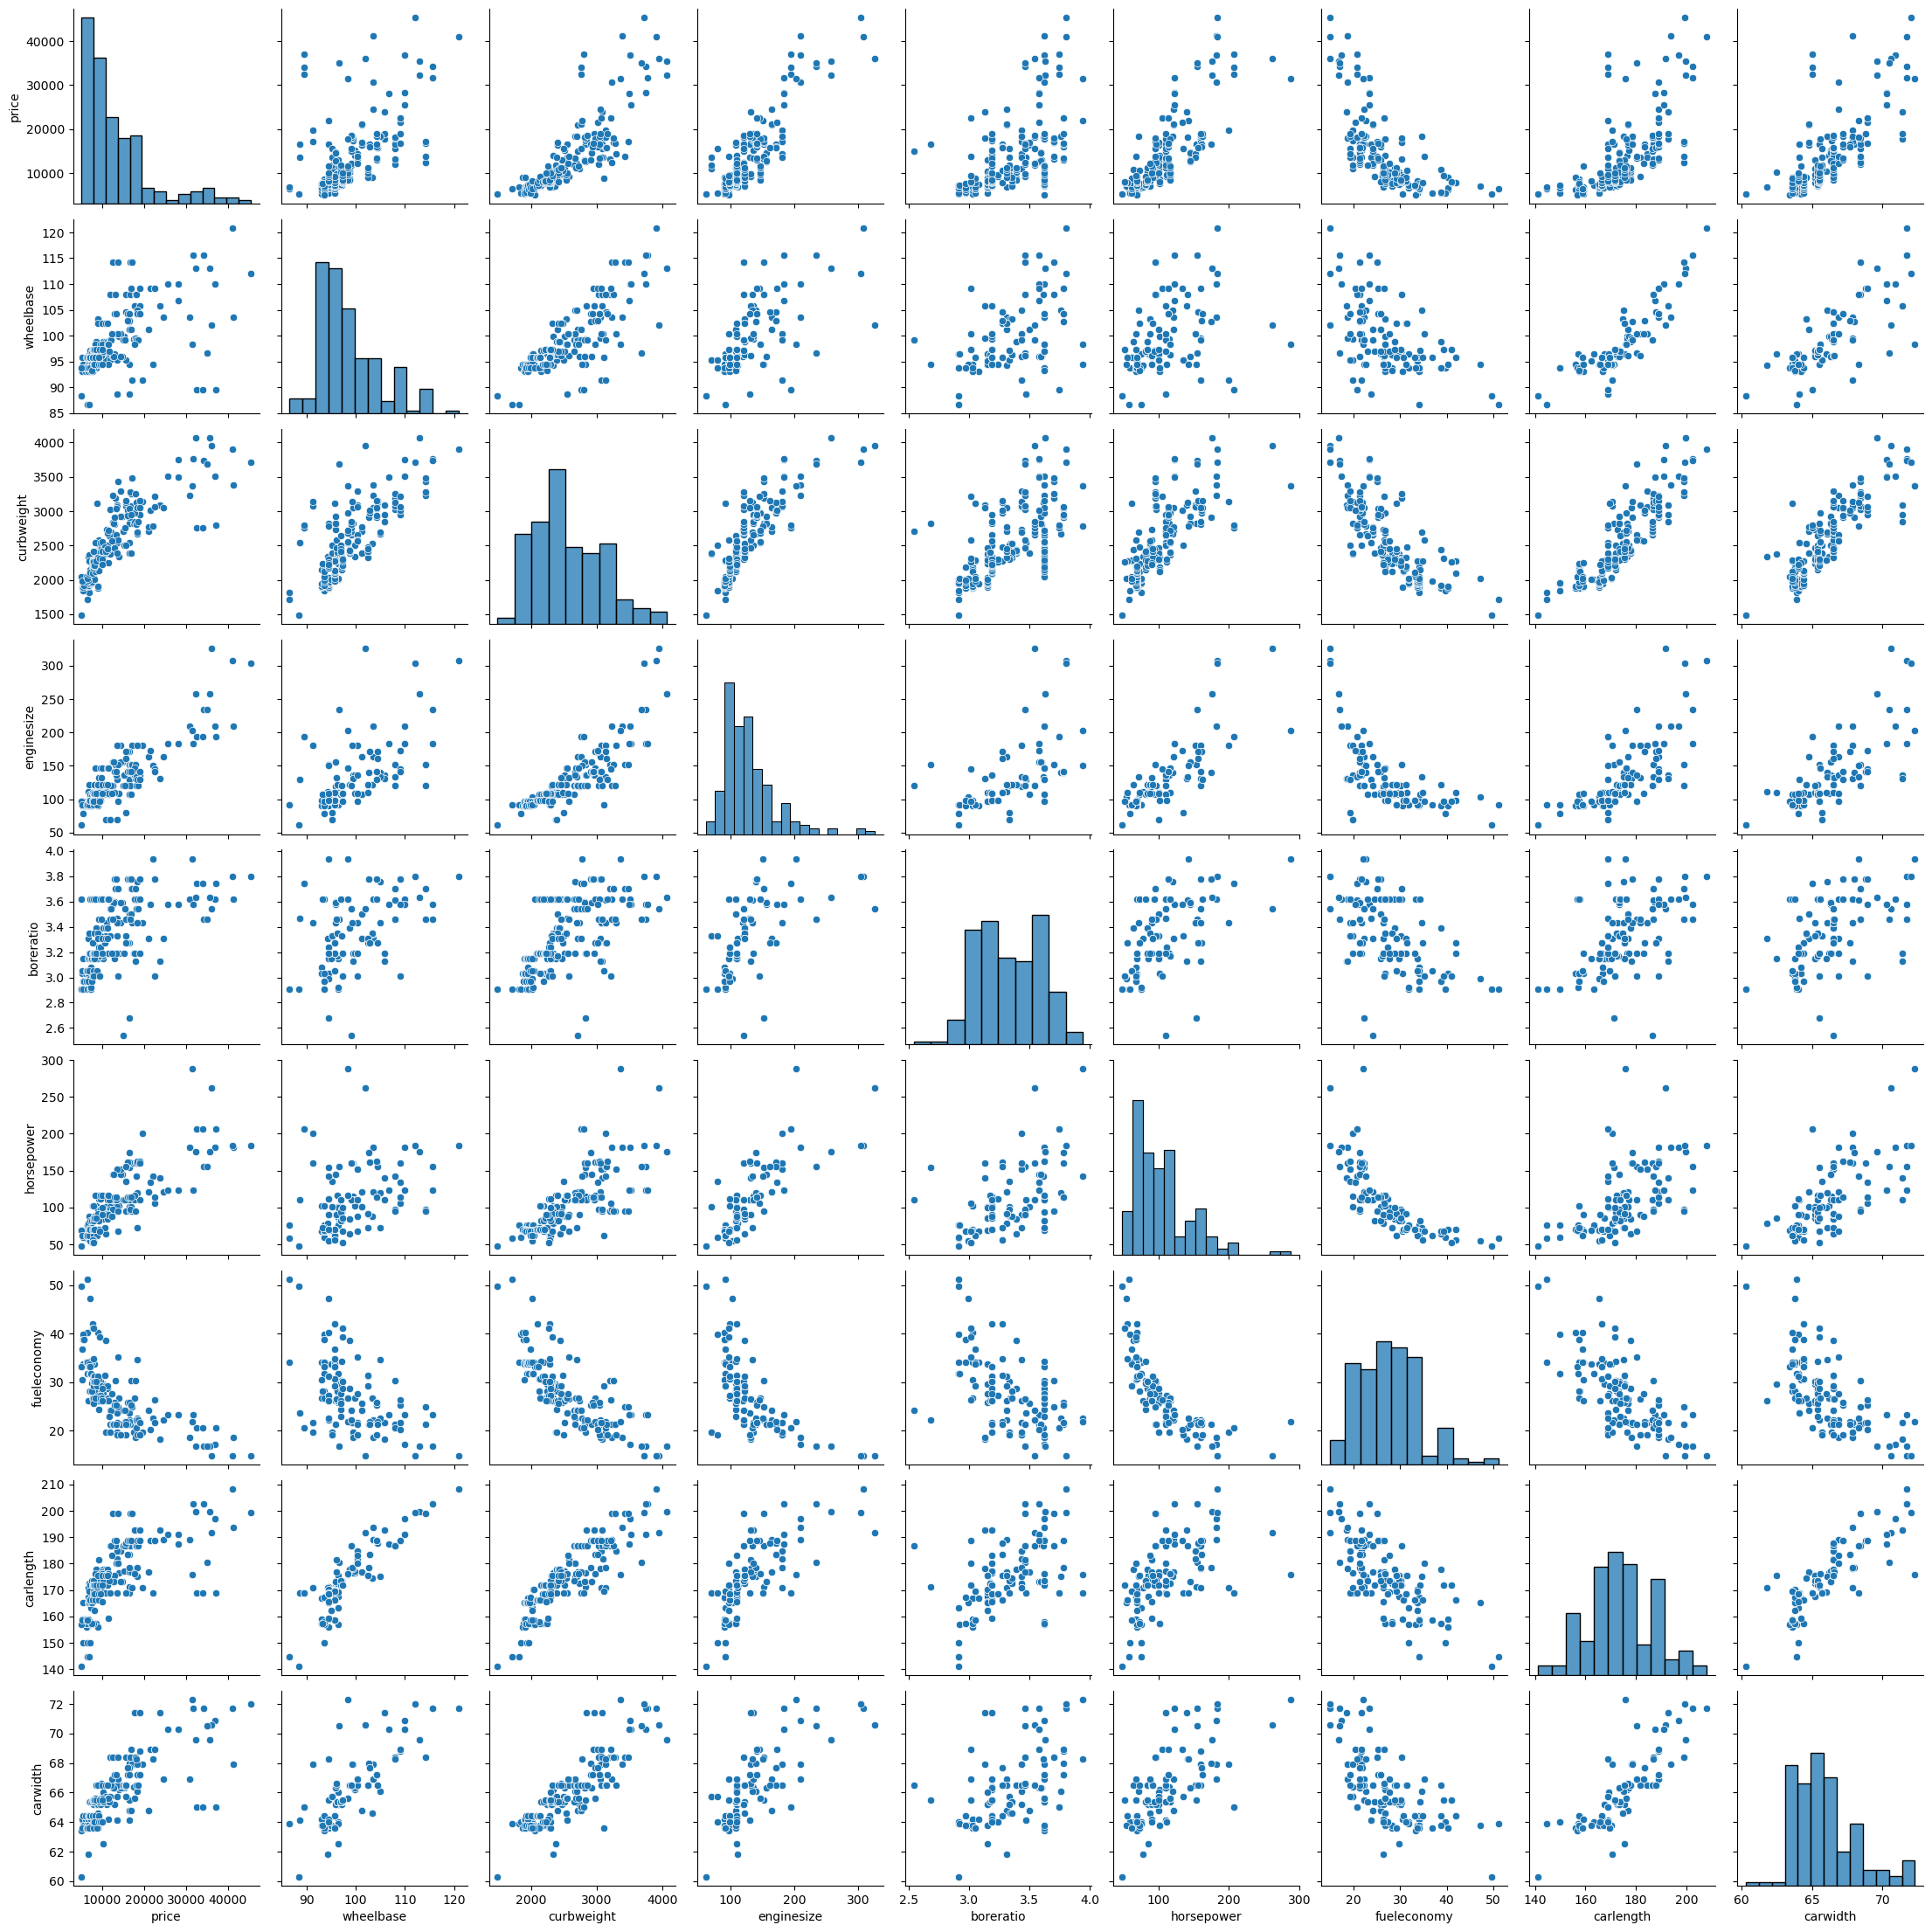

In [23]:
# We choose important features to our model and use pairplot plot of seaborn library. We got the some awesome linear regreesion
# relation between feartures and some of out there are reverse linear regreesion like fuel economu - horsepower.
cars_lr = cars[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight','enginetype','cylindernumber',
               'enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth','carsrange']]
sns.pairplot(cars_lr)
plt.show()
